In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
plt.style.use('ggplot')

In [2]:
df=pd.read_excel('National_track_records.xlsx')

In [3]:
df.head(5)

,100m,200m,400m,800m,1500m,5000m,10000m,Marathon
0,10.23,20.37,46.18,1.77,3.68,13.33,129.57,27.65
1,9.93,20.06,44.38,1.74,3.53,12.93,127.51,27.53
2,10.15,20.45,45.80,1.77,3.58,13.26,132.22,27.72
3,10.14,20.19,45.02,1.73,3.57,12.83,127.20,26.87
4,10.27,20.30,45.26,1.79,3.70,14.64,146.37,30.49


In [8]:
df.shape

(54, 8)

In [14]:
df=pd.DataFrame(data=df,columns=df.columns)

In [15]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled =scaler.transform(df)

In [16]:
df_scaled.shape

(54, 8)

In [17]:
dataframe_scaled=pd.DataFrame(data=df_scaled,columns=df.columns)

In [19]:
dataframe_scaled.head(4)

,100m,200m,400m,800m,1500m,5000m,10000m,Marathon
0,0.072321,-0.315546,0.234542,0.035637,0.195633,-0.381544,-0.440957,-0.532110
1,-1.259039,-0.885982,-1.022211,-0.541684,-0.770604,-0.912216,-0.673255,-0.604246
2,-0.282709,-0.168337,-0.030772,0.035637,-0.448525,-0.474411,-0.142127,-0.490031
3,-0.327087,-0.646767,-0.575365,-0.734124,-0.512941,-1.044884,-0.708213,-1.000991


In [25]:
pca=PCA(n_components=8)
pca.fit_transform(df_scaled)

In [46]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

In [44]:
prop_var

array([0.83297067, 0.08011858, 0.02884009, 0.02788207, 0.01195941,
       0.01072319, 0.00627144, 0.00123456])

In [28]:
eigenvalues

array([6.7894968 , 0.65304198, 0.23507396, 0.22726515, 0.09748045,
       0.08740412, 0.05111813, 0.0100628 ])

In [49]:
p=np.transpose(np.matrix(prop_var))
e=np.transpose(np.matrix(eigenvalues))

In [64]:
result = np.column_stack((p,e))
print(result)
pca_result=pd.DataFrame(data=result,columns=['prop_var','eigenvalues'])


[[8.32970673e-01 6.78949680e+00]
 [8.01185763e-02 6.53041981e-01]
 [2.88400927e-02 2.35073964e-01]
 [2.78820665e-02 2.27265146e-01]
 [1.19594070e-02 9.74804495e-02]
 [1.07231911e-02 8.74041239e-02]
 [6.27143695e-03 5.11181276e-02]
 [1.23455659e-03 1.00628009e-02]]


In [66]:
pca_result

,prop_var,eigenvalues
0,0.832971,6.789497
1,0.080119,0.653042
2,0.028840,0.235074
3,0.027882,0.227265
4,0.011959,0.097480
5,0.010723,0.087404
6,0.006271,0.051118
7,0.001235,0.010063


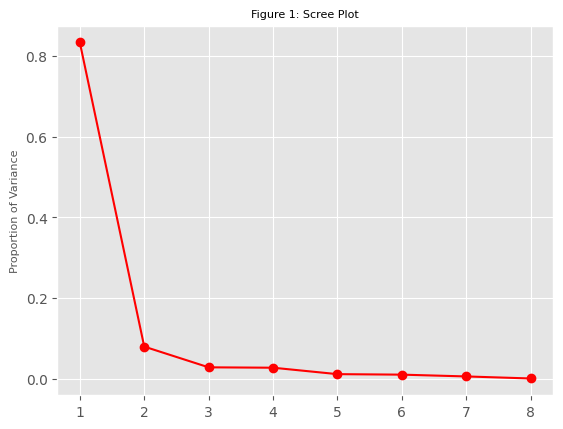

In [24]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()